# Verifying the Assumptions of Linear Regression in Python and R

Linear regression is one of the most basic machine learning algorithms and is often used as a benchmark for more advanced models. I assume the reader knows the basics of how linear regression works and what a regression problem is in general. That is why in this short article I would like to focus on the assumptions of the algorithm - what they are and how we can verify them using Python and R. I do not try to apply the solutions here, but indicate what they could be.

In this article I mainly use Python (in Jupyter Notebook), but I also show how to use `rpy2` - an 'interface between both languages to benefit from the libraries of one language while working in the other'. It enables us to run both R and Python in the same Notebook and even transfer objects between the two. Intuitively, we need to have R installed on our computer as well. 

Disclaimer: Some of the cells using `rpy2` do not work and I have to 'cheat' by running them in R to show the results. This is mostly the case for cells using `ggplot2`. Nonetheless, I leave the code in these cell. Let me know in the comments if this works for you :)

Let's start!

## Data

For this article I use a classic regression dataset - Boston house prices. For simplicity, I only take the numeric variables. That's why I drop the only boolean feature - CHAS. I am not going to go deeper into the meaning of the features, but this can always be inspected by running `print(boston.DESCR)`.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Running Linear Regression

Most readers would probably estimate a linear regression model like this:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercept: 36.89195979693238
R^2 score: 0.7355165089722999


Which is of course not a wrong approach. However, coming to Python from R, I had a bit higher expectations about the amount of information I receive by default. To run R inside our Notebook we first need to run the magic command:

In [3]:
%load_ext rpy2.ipython

Afterwards, using another magic command indicate that the cell contains R code. At this step, I also use the input command `-i` to indicate that I am passing an object from Python to R. To retrieve the output from R to Python we can use `-o`. Running the two lines results in much more information, including statistical significance and some metrics like R^2.

In [4]:
%%R -i X -i y

lin_reg <- lm(y ~ ., data = cbind(X, y))
summary(lin_reg)


Call:
lm(formula = y ~ ., data = cbind(X, y))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3968  -2.8103  -0.6455   1.9141  26.3755 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.891960   5.146516   7.168 2.79e-12 ***
CRIM         -0.113139   0.033113  -3.417 0.000686 ***
ZN            0.047052   0.013847   3.398 0.000734 ***
INDUS         0.040311   0.061707   0.653 0.513889    
NOX         -17.366999   3.851224  -4.509 8.13e-06 ***
RM            3.850492   0.421402   9.137  < 2e-16 ***
AGE           0.002784   0.013309   0.209 0.834407    
DIS          -1.485374   0.201187  -7.383 6.64e-13 ***
RAD           0.328311   0.066542   4.934 1.10e-06 ***
TAX          -0.013756   0.003766  -3.653 0.000287 ***
PTRATIO      -0.990958   0.131399  -7.542 2.25e-13 ***
B             0.009741   0.002706   3.600 0.000351 ***
LSTAT        -0.534158   0.051072 -10.459  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

Of course Python does not stay behind and we can obtain similar level of details using another popular library - `statsmodels`. One thing to bear in mind is that when using linear regression in `statsmodels` we need to add a column of ones to serve as intercept. For that I use `add_constant`. The results are much more informative than the default ones from `sklearn`.

In [13]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

/Users/eryklewinson/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          7.30e-134
Time:                        13:43:11   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So now we see how to run linear regression in R and Python. Let's continue to the assumptions. I break these down into two parts:
* assumptions from the Gauss-Markov Theorem
* rest of assumptions 

## Gauss-Markov Theorem

During your statistics or econometrics courses you might have heard the acronym BLUE in the context of linear regression. What was the meaning of it? According to the [Gauss–Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem), in a linear regression model the ordinary least squares (OLS) estimator gives the best linear unbiased estimator (BLUE) of the coefficients, provided that:
* the expectation of errors (residuals) is 0
* the errors are uncorrelated
* the errors have equal variance - homoscedasticity of errors

Also, 'best' in BLUE means resulting in lowest variance of the estimate, in comparison to other unbiased, linear estimators. 

For the the estimator to be BLUE, the residuals do not need to follow normal (Gaussian) distribution, nor do they need to be [independent and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables).

### Linearity of the model

The dependent variable (y) is assumed to be a linear function of the independent variables (X, features) specified in the model. The specification must be linear in its parameters. Fitting a linear model to data with non-linear patterns results in serious prediction errors, especially out-of-sample (data not used for training the model).

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around horizontal line in the latter one. In both cases with a roughly constant variance. 

Observing a "bowed" pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions. When the model contains many features, nonlinearity can also be revealed by systematic patterns in plots of the residuals vs. individual features.

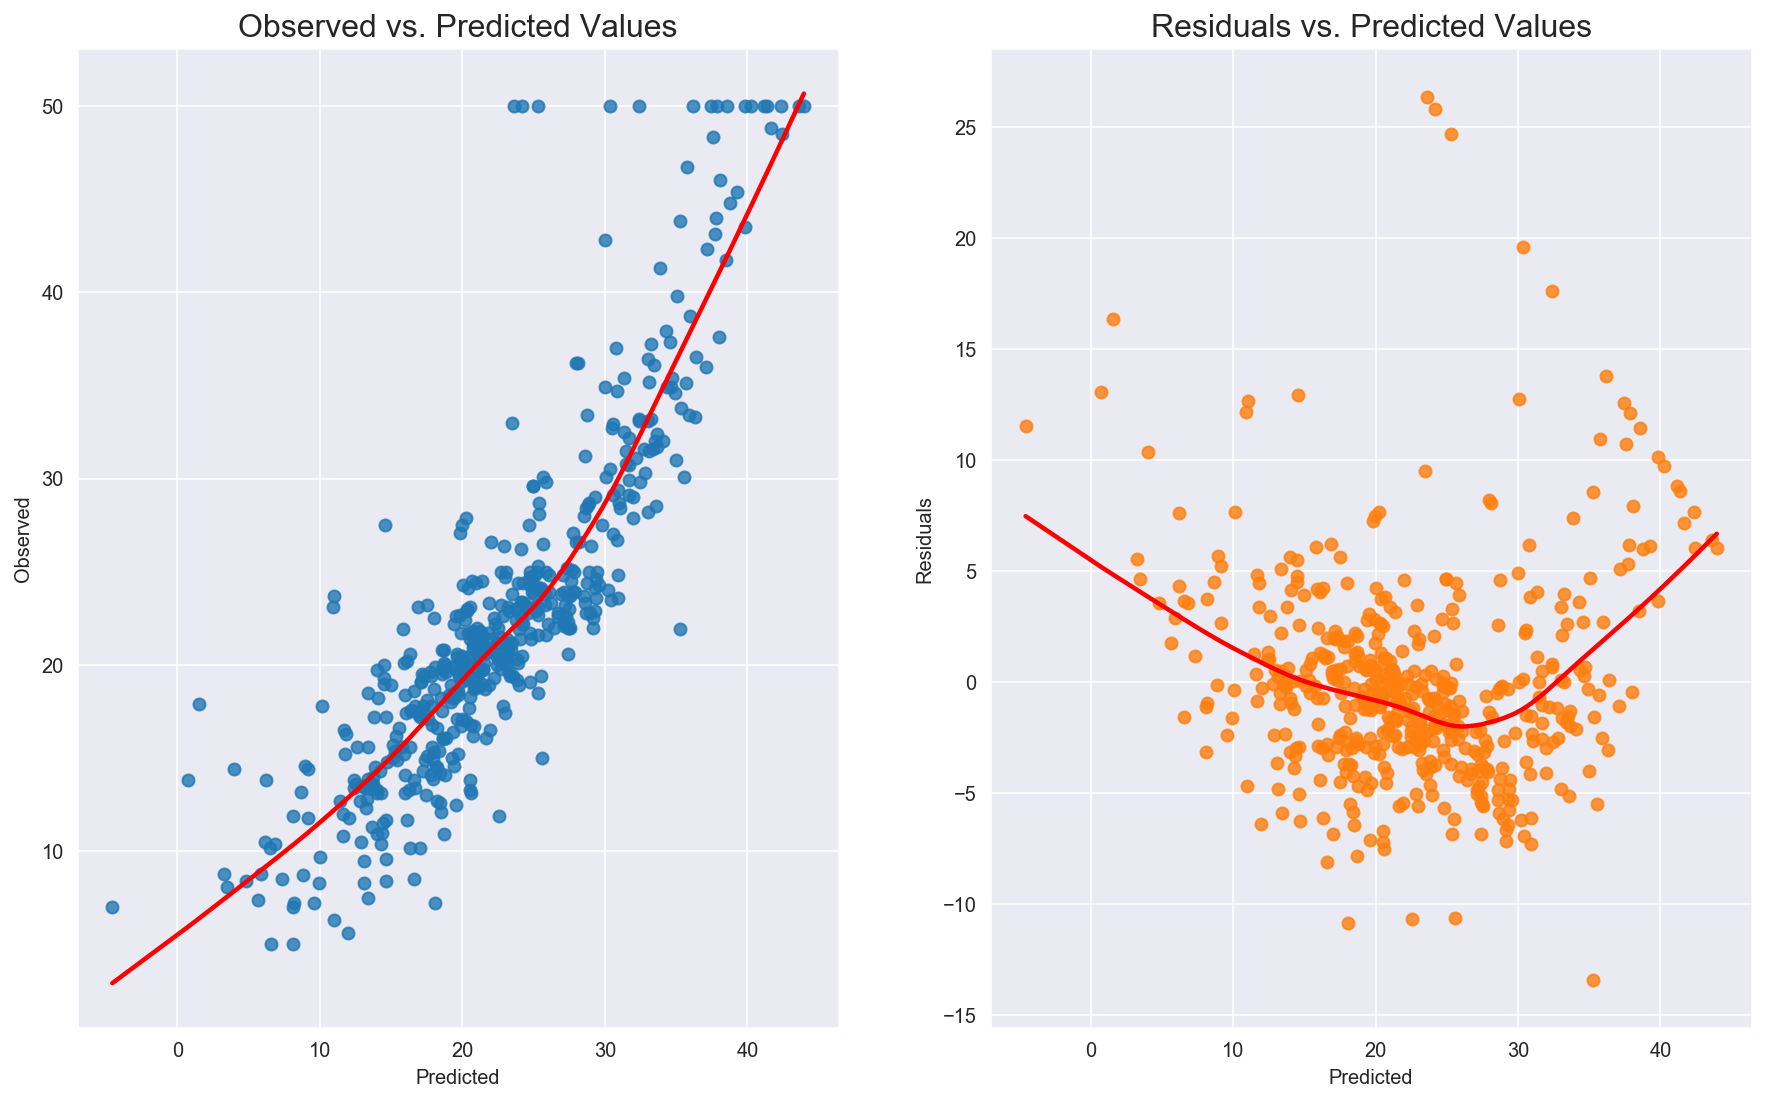

In [16]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    
    

In [ ]:
%%R -i y

p1 <- ggplot(lin_reg, aes(.fitted, .resid)) + geom_point()
p1 <- p1 + stat_smooth(method="loess") + geom_hline(yintercept=0, col="red", linetype="dashed")
p1 <- p1 + xlab("Predicted") + ylab("Residuals")
p1 <- p1 + ggtitle("Residuals vs. Predicted Values") + theme_bw()

df_plt <- data.frame("fitted" = fitted(lin_reg), "observed" = X$medv)
p2 <- ggplot(df_plt, aes(x=fitted, y=observed)) + geom_point()
p2 <- p2 + stat_smooth(method="loess") + geom_abline(intercept = 1, col="red", linetype="dashed")
p2 <- p2 + xlab("Predicted") + ylab("Observed")
p2 <- p2 + ggtitle("Observed vs. Predicted Values") + theme_bw()

grid.arrange(p2, p1, ncol=2)

Inspection of the plots shows that the linearity assumption is not satisfied. 

Potential solutions:
* non-linear transformations to dependent/independent variables
* adding extra features which are a transformation of the already used ones (for example squared version)
* adding features that were not considered before

### Expectation (mean) of residuals is zero

This one is easy to check:

In [7]:
lin_reg.resid.mean()

-1.0012544153465325e-13

In [8]:
%%R
mean(lin_reg$resid)

[1] 2.018759e-17


The results are a bit different, as far as I know this is a numeric approximation issue. However, we can assume that the expectation of residuals is indeed 0.

### No (perfect) multicollinearity

In other words, the features should be linearly independent. What does that mean in practice? We should not be able use a linear model to accurately predict one feature using another one. Let's take X1 and X2 as examples of features. It could happen that X1 = 2 + 3 * X2, which violates the assumption.

One scenario to watch out for is the 'dummy variable trap' - when we use dummy variables to encode a categorical feature and do not omit the baseline level from the model. This results in perfect correlation between the dummy variables and the constant term.

Multicollinearity can be present in the model, as long as it is not 'perfect'. In the former case, the estimates are less efficient, but still unbiased. The estimates will be less precise and highly sensitive to particular sets of data.

We can detect multicollinearity using [variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) (VIF). Without going into too much details, the interpretation of VIF is as follows: the square root of a given variable's VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.787705,2.298257,3.949246,4.388775,1.931865,3.092832,3.954961,7.397844,8.876233,1.783302,1.344971,2.931101


In [ ]:
%%R
library(car)
vif(lin_reg)

To deal with multicollinearity we should iteratively remove features with high values of VIF. A rule of thumb for removal could be VIF larger than 10 (5 is also common). Another possible solution is to use PCA to reduce features to a smaller set of uncorrelated components.

Tip: we can also look at correlation matrix of features to identify dependencies between them.

### Homoscedasticity (equal variance) of residuals

When residuals do not have constant variance (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. For example, if the variance of the residuals is increasing over time, confidence intervals for out-of-sample predictions will be unrealistically narrow. Another effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients - the subset in which the error variance was largest.

To investigate if the residuals are homoscedastic, we can look at a plot of residuals (or standardized residuals) vs. predicted (fitted) values. What should alarm us is the case when the residuals grow either as a function of predicted value or time (in case of time series). 

We can also use two statistical tests: Breusch-Pagan and Goldfeld-Quandt. In both of them the null hypothesis assumes homoscedasticity and a p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity. 

In the snippets below I plot residuals (and standardized ones) vs. fitted values and carry out the two mentioned tests. To identify homoscedasticity in the plots, the placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible - the red line in the R plots should be flat. We can see that this is not the case for our dataset.


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  6.028613e+01
p-value                        2.001794e-08
f-value                        5.556828e+00
f p-value                      5.935449e-09

 Goldfeld-Quandt test ----
                    value
F statistic  2.620956e+00
p-value      1.251137e-13

 Residuals plots ----


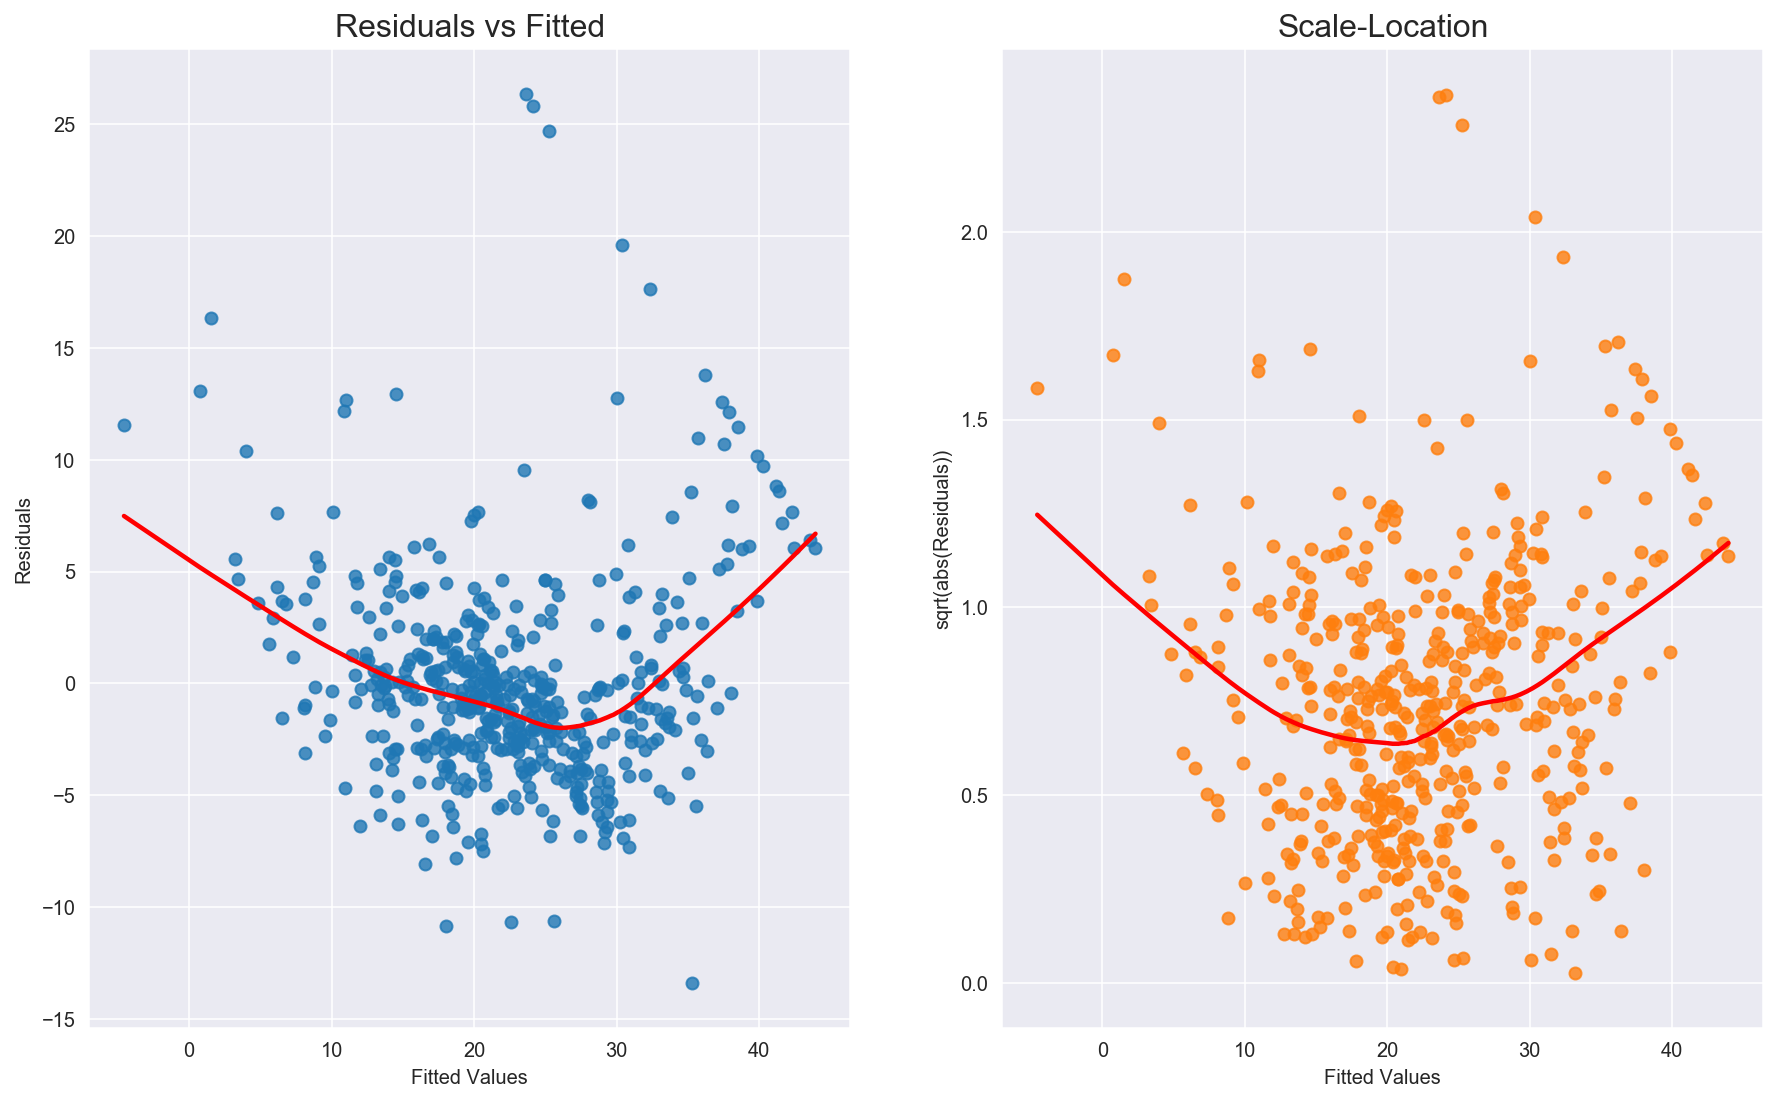

In [10]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

In [ ]:
%%R
library(lmtest)

par(mfrow=c(2,2))  # set 2 rows and 2 column plot layout
plot(lin_reg)

# Breusch-Pagan test
print(bptest(lin_reg, data = X, studentize = TRUE))
# Goldfeld-Quandt
print(gqtest(lin_reg))

The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity.

Potential solutions:
* log transformation of dependent variable
* in case of time series, deflating a series if it concerns monetary value
* using ARCH (auto-regressive conditional heteroscedasticity) models to model the error variance. An example might be stock market, where data can exhibit periods of increased or decreased volatility over time (volatility clustering, see [this article](https://towardsdatascience.com/introduction-to-quantitative-finance-part-i-stylised-facts-of-asset-returns-5190581e40ea) for more information)

### No autocorrelation of residuals

This assumption is especially dangerous in time-series models, where serial correlation in the residuals implies that there is room for improvement in the model. Extreme serial correlation is often a sign of a badly mis-specified model. Another reasons for serial correlation in the residuals could be violation of the linearity assumption or due to bias that is explainable by omitted variables (interaction terms or dummy variables for identifiable conditions). An example of the former case might be fitting a (straight) line to data, which exhibits exponential growth over time.

This assumption also has meaning in case of non-time-series models. If residuals always have the same sign under particular conditions, it means that the model systematically underpredicts/overpredicts what happens when the predictors have a particular configuration. 

To investigate if autocorrelation is present, I use ACF (autocorrelation function) plots and Durbin-Watson test.

In the former case, we want to see if the value of ACF is significant for any lag (in case of no time-series data, row number is used). While calling the function, we indicate the significance level (see (this article)[https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26] for more details) we are interested in and the critical area is plotted on the graph. Significant correlations lie outside of that area. 

Note: when dealing with data without the time dimension, we can alternatively plot the residuals vs. the row number. In such cases rows should be sorted in a way that (only) depends on the values of the feature(s).

The second approach is using the Durbin-Watson test. I do not go into details how it is constructed, but provide high level overview. The test statistic provides a test for significant residual autocorrelation at lag 1. The DW statistic is approximately equal to `2(1-a)`, where `a` is the lag-1 residual autocorrelation. The DW test statistic is located in the default summary output of `statsmodels`'s regression.

Some notes on the Durbin-Watson test:
* the test statistic always has value between 0 and 4
* value of 2 means that there is no autocorrelation in the sample
* values `<2` indicate positive autocorrelation, values `>2` negative one.

/Users/eryklewinson/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


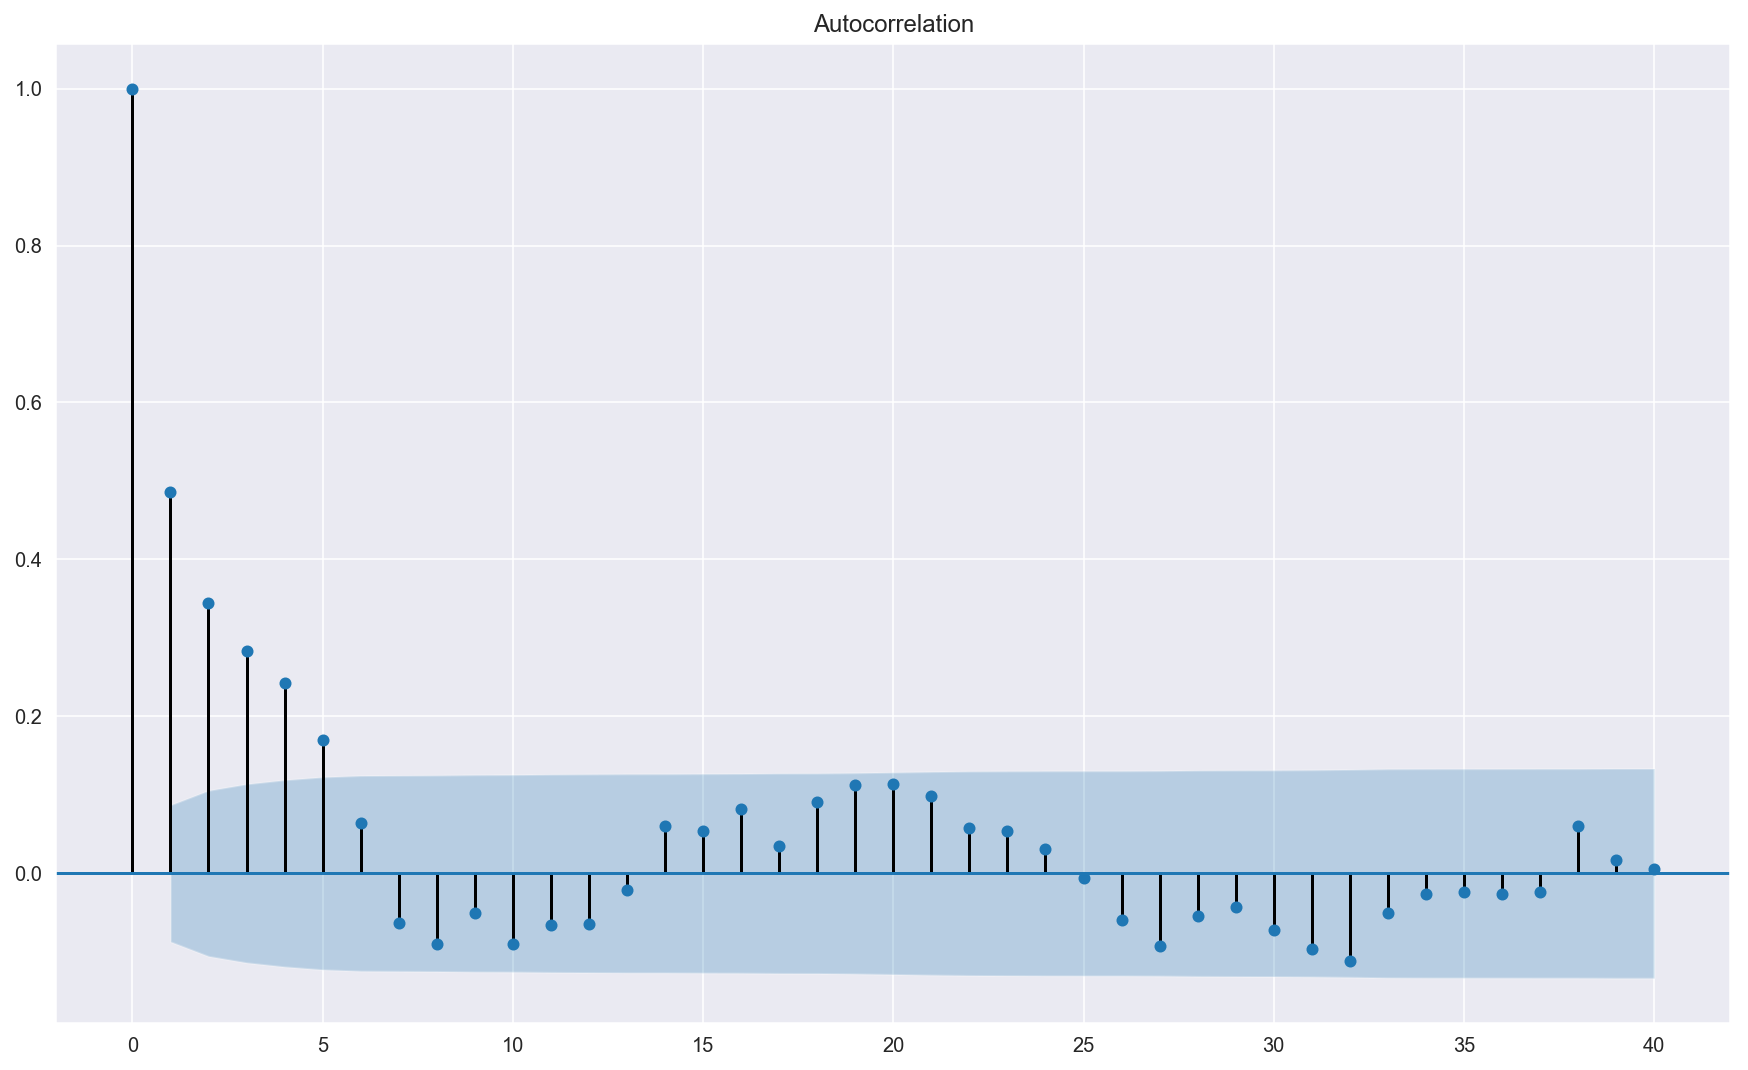

In [11]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

In [ ]:
%%R

library(ggplot2)
library(lmtest)

acf(lin_reg$residuals)  
dwtest(lin_reg)

Potential solutions:
* in case of minor positive autocorrelation, there might be some room for fine-tuning the model, for example, adding lags of the dependent/independent variables 
* some seasonal components might not be captured by the model, account for them using dummy variables or seasonally adjust the variables
* if `DW < 1` it might indicate a possible problem in model specification, consider stationarizing time-series variables by differencing, logging, and/or deflating (in case of monetary values)
* in case of significant negative correlation, some of the variables might have been overdifferenced
* use Generalized Least Squares
* include a linear (trend) term in case of a consistent increasing/decreasing pattern in the residuals

## Other assumptions

Below I present some of the other commonly verified assumptions of linear regression.

### The features and residuals are uncorrelated

To investigate this assumption I check the Pearson correlation coefficient between each feature and the residuals. Then report the p-value for testing lack of correlation between the two considered series.

In [12]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: CRIM --- correlation: 0.0000, p-value: 1.0000
Variable: ZN --- correlation: -0.0000, p-value: 1.0000
Variable: INDUS --- correlation: 0.0000, p-value: 1.0000
Variable: NOX --- correlation: 0.0000, p-value: 1.0000
Variable: RM --- correlation: -0.0000, p-value: 1.0000
Variable: AGE --- correlation: 0.0000, p-value: 1.0000
Variable: DIS --- correlation: -0.0000, p-value: 1.0000
Variable: RAD --- correlation: 0.0000, p-value: 1.0000
Variable: TAX --- correlation: 0.0000, p-value: 1.0000
Variable: PTRATIO --- correlation: 0.0000, p-value: 1.0000
Variable: B --- correlation: -0.0000, p-value: 1.0000
Variable: LSTAT --- correlation: 0.0000, p-value: 1.0000


In [13]:
%%R

for (i in 1:(dim(X)[2])){
    cor_test <- cor.test(X[, i], lin_reg$residuals)  # 
    print(paste('Variable:', colnames(X)[i], 
                '--- correlation:', as.character(cor_test$estimate), 
                ', p-value:', as.character(cor_test$p.value), sep = " ", collapse = NULL))
    }


[1] "Variable: CRIM --- correlation: -1.23790541661334e-17 , p-value: 1"
[1] "Variable: ZN --- correlation: -1.97025792143074e-17 , p-value: 1"
[1] "Variable: INDUS --- correlation: 1.86969111454043e-16 , p-value: 0.999999999999997"
[1] "Variable: NOX --- correlation: 7.78555411954571e-18 , p-value: 1"
[1] "Variable: RM --- correlation: -1.87370697712339e-17 , p-value: 1"
[1] "Variable: AGE --- correlation: -2.12484228685413e-16 , p-value: 0.999999999999996"
[1] "Variable: DIS --- correlation: -2.44313238639036e-17 , p-value: 1"
[1] "Variable: RAD --- correlation: 3.00418785293366e-16 , p-value: 0.999999999999995"
[1] "Variable: TAX --- correlation: -1.83699416677024e-16 , p-value: 0.999999999999997"
[1] "Variable: PTRATIO --- correlation: 2.64955201707963e-15 , p-value: 0.999999999999952"
[1] "Variable: B --- correlation: -3.77372138576403e-16 , p-value: 0.999999999999993"
[1] "Variable: LSTAT --- correlation: -1.07867254452892e-16 , p-value: 0.999999999999998"


I cannot reject the null hypothesis (lack of correlation) for any pair.

### The number of observations must be greater than number of features

This one is pretty straightforward. We can check the shape of out data by using `shape` method in Python or `dim` function in R. Also, a rule of thumb says that we should have more than 30 observations in the dataset. This is taken from the Central Limit Theorem, which states that adding IID random variable results in a normalized distribution when the sample size is greater than 30, even when the random variables are not Gaussian themselves.

### There must be some variability in features

This assumption states that there must be some variance in the features, as a feature that has a constant value for all or majority of observations might not be a good predictor. We can check this assumption by simply checking the variance of all features. 

In [14]:
X.apply(np.var, axis=0)

CRIM          73.840360
ZN           542.861840
INDUS         46.971430
NOX            0.013401
RM             0.492695
AGE          790.792473
DIS            4.425252
RAD           75.666531
TAX        28348.623600
PTRATIO        4.677726
B           8318.280421
LSTAT         50.893979
dtype: float64

In `caret` package in R there is a function called `nearZeroVar` for identifying features with zero or near-zero variance.

In [ ]:
%%R
library(caret)

apply(X, 2, var)
nearZeroVar(X, saveMetrics= TRUE)

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: ggplot2



### Normality of residuals

When this assumption is violated, it causes problems with calculating confidence intervals and various significance tests for coefficients. When the error distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow.

Some of the potential reasons causing non-normal residuals:
* presence of a few large outliers in data 
* there might be some other problems (violations) with the model assumptions
* another, better model specification might be better suited for this problem

Technically, we can omit this assumption if we assume instead that the model equation is correct and our goal is to estimate the coefficients and generate predictions (in the sense of minimizing mean squared error).

However, normally we are interested in making valid inferences from the model or estimating the probability that a given prediction error will exceed some threshold in a particular direction. To do so, the assumption about normality of residuals must be satisfied.

To investigate this assumption we can look at:
* QQ plots of the residuals (a detailed description can be found [here](https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703)). For example a bow-shaped pattern of deviations from the diagonal implies that the residuals have excessive skewness (i.e., the distribution is not symmetrical, with too many large residuals in one direction). S-shaped pattern of deviations implies excessive kurtosis of the residuals - there are either too many or two few large errors in both directions.
* use statistical tests such as the Kolmogorov-Smirnov test, the Shapiro-Wilk test, the Jarque-Bera test and the Anderson-Darling test

Jarque-Bera test ---- statistic: 898.3521, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8953, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3283, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.9109, 5% critical value: 0.7810
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


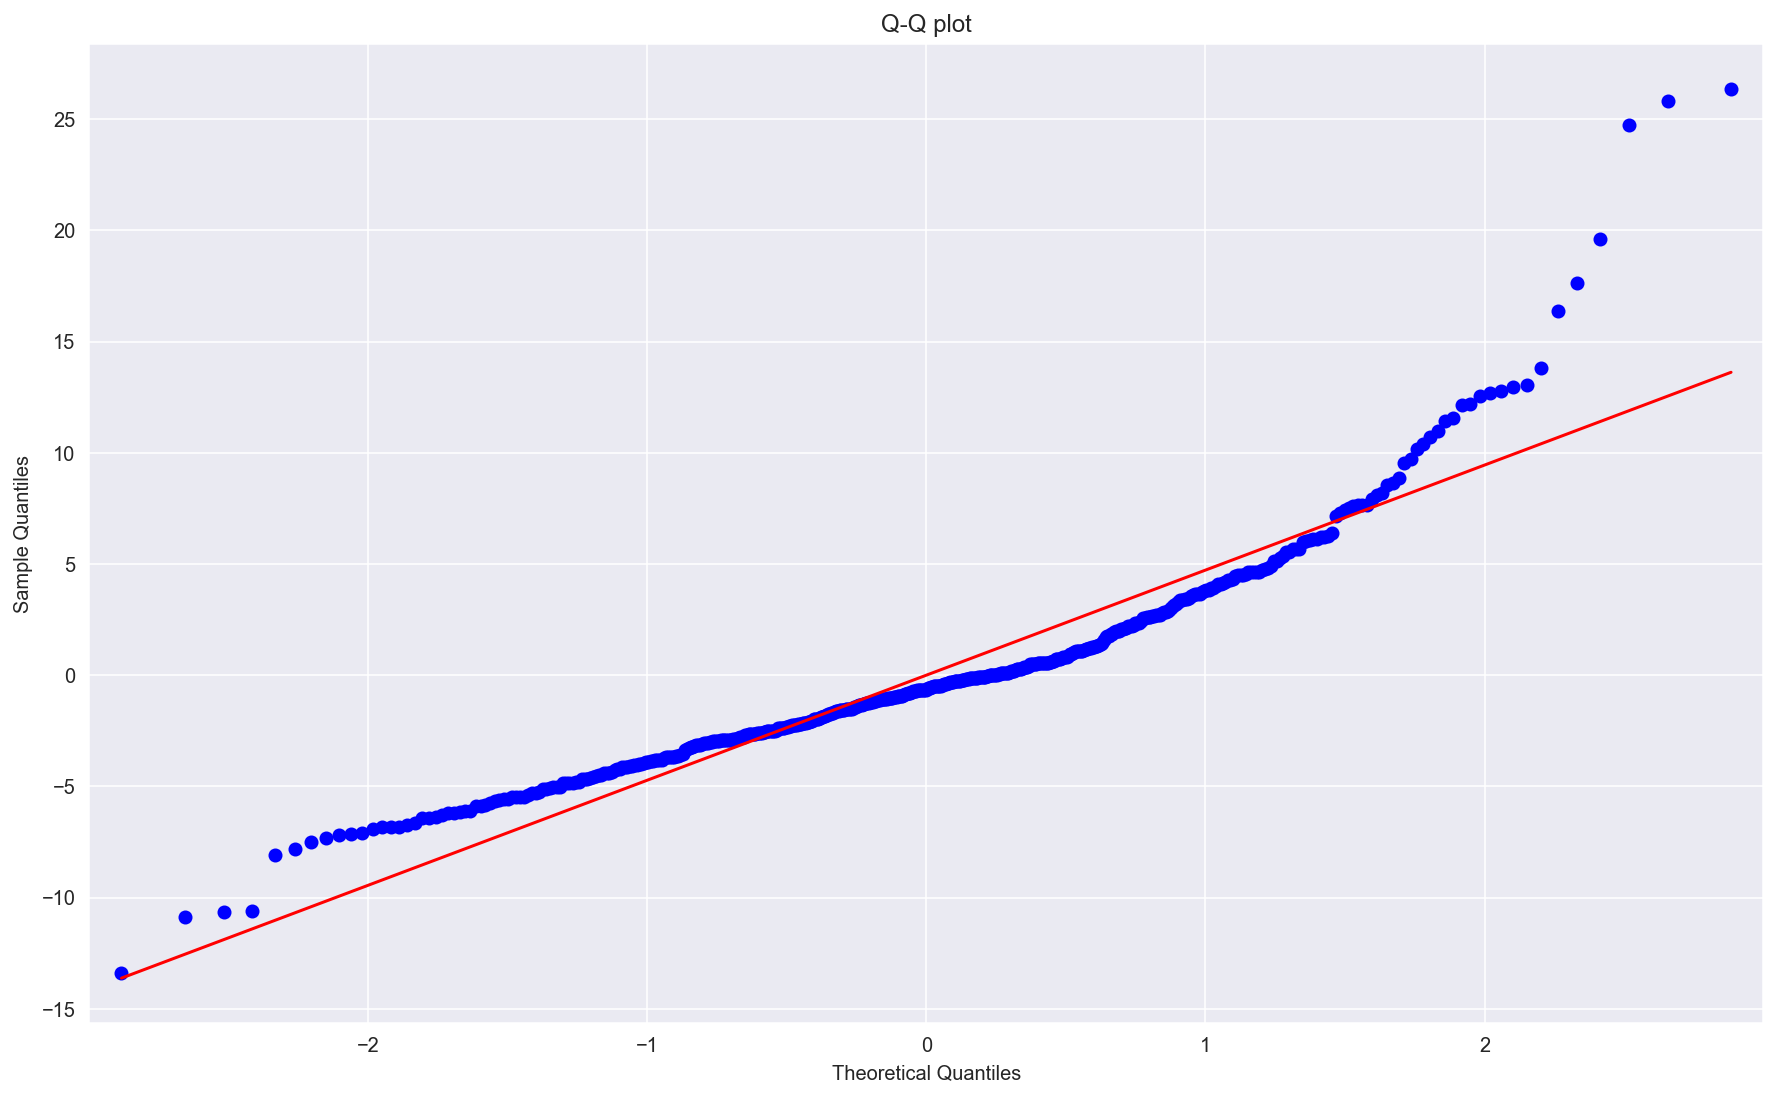

In [10]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

In [ ]:
%%R
library(tseries)
library(olsrr)

qqnorm(lin_reg$residuals)

# or 

df_resid <- data.frame(resid = lin_reg$residuals)
p <- ggplot(df_resid, aes(sample = resid))
p + stat_qq() + stat_qq_line()

jarque.bera.test(lin_reg$residuals)
ks.test(as.numeric(lin_reg$residuals), "pnorm")

ols_test_normality(lin_reg)

From the results above we can infer that the residuals do not follow Gaussian distribution - from the shape of the QQ plot, as well as rejecting the null hypothesis in all statistical tests. The reason why Kolmogorov-Smirnov from `ols_test_normality` shows different results is that it does not run the `two-sided` version of the test.

Potential solutions:
* nonlinear transformation of target variable or features
* remove/treat potential outliers
* it can happen that there are two or more subsets of the data having different statistical properties, in which case separate models might be considered

## Bonus: Outliers

This is not really an assumption, however the existence of outliers in our data can lead to violations of some of the above-mentioned assumptions. That is why we should investigate the data and verify if some extreme observations are valid and important for our research or merely some errors which we can remove. 

I will not dive deep into outlier detection methods as there are already many articles about them. A few potential approaches:
* Z-score
* box plot
* Leverage - measure of how far away the feature values of a point are from the values of the different observations. High-leverage point is a point at extreme values of the variables, where lack of nearby observations makes the fitted regression model pass close to that particular point.
* Cook’s distance - measure of how deleting an observation impacts the regression model. It makes sense to investigate points with high Cook’s distances.
* Isolation Forest - for more details see [this article](https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)

## References

http://people.duke.edu/~rnau/testing.htm